### **Jawaban Latihan1**
1. Annisa Zahra - 2006463295
2. Angelica Patricia Djaya Saputra -2006522000
3. Hosia Josindra Saragih-2006463332
4. Hanifah Sulasri - 1906376810
5. Rafi Alvanzah - 2006528736

### **Import Module**

Pada Topic Modelling, terdapat beberapa module yang diperlukan yaitu
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn

*Tambahan* : Module Warnings ditambahkan untuk menghilangkan result berupa peringatan

In [1]:
#Melakukan import module warning untuk melakukan ignoring terhadap perintah warning 
import warnings; warnings.simplefilter('ignore')

In [3]:
#Melakukan import module yang dibutuhkan untuk Topic Modelling
!pip install wordcloud
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
sns.set(style="ticks", color_codes=True)

### **Load/Import Data**

Akan digunakan 20 Newsgroups dataset dari module sklearn

In [4]:
#Melakukan import data yang disediakan oleh sklearn berupa 20newsgroups
from sklearn.datasets import fetch_20newsgroups

In [5]:
#Menginisiasikan grup ke dalam variabel dataset dan documents
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

Melakukan pengecekan terhadap isi data untuk mempermudah melihat *insight* dari data

In [6]:
#Melihat cuplikan dari data yang diperoleh
documents[:1]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"]

In [7]:
#Melihat total panjang dokumen (data) pada grup
print("Total Documents: ", len(documents))

Total Documents:  11314


In [8]:
#20 newsgroup pada dataset
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


### **Preprocessing Cleaning Data**

Proses ini dilakukan agar data yang dimiliki sudah siap untuk digunakan

In [9]:
#Melakukan transformasi bentuk data ke dalam dataframe dengan module pandas
news_df = pd.DataFrame({'document':documents})

Dari data sebuah artikel, perlu dilakukan cleaning data sebagai berikut

In [10]:
#Menghapus semua elemen kecuali huruf alfabet dan menggantinya dengan character kosong
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

In [11]:
#Akan terdapat banyak kata yang tidak memuat informasi sehingga akan dihapuskan
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
#Mengubah semua huruf ke dalam huruf kecil
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

Akan dilakukan penghapusan stop-words seperti 'it',they','am','been','the', dll karena kata-kata tersebut berantakan dan hampir tidak membawa informasi apapun.

In [13]:
#Memuat stopwords (here I used Spacy for stopwords you can also use NLTK)
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

In [14]:
#Melakukan tokenization yaitu memecah kalimat menjadi kata-kata
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

In [15]:
#Menghilangkan stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [16]:
#Melakukan de-tokenization yaitu menggabungkan kata-kata untuk mendapatkan kembali kalimatnya
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

### **Document-Term Matrix**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, #mempertahankan 1000 istilah teratas karena batas komputasi
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape #memeriksa bentuk document-term matrix

(11314, 1000)

Setiap baris dari matriks X (document-term matrix) adalah representasi vektor dari document yang bersangkutan. Panjang vektor ini adalah k yang merupakan jumlah topik yang diinginkan.

### **Topic Modelling**

In [18]:
from sklearn.decomposition import TruncatedSVD

# SVD merepresentasikan documents dan terms dalam bentuk vektor
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122) # Dibentuk model SVD dengan memanfaatkan modul TruncatedSVD

svd_model.fit(X) # Melakukan fitting dataset pada model

len(svd_model.components_) #Mencari panjang dari svd_model.components_

20

In [19]:
terms = vectorizer.get_feature_names() #membuat list berupa string untuk setiap kata dari vectorizer
topic_term_list=[] #list term utk visualisasi wordcloud

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp) #menggabungkan terms dan entri menjadi terms_comp
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7] #mengurutkan 8 terms(kata) paling sering ditemukan berdasarkan nilai entri svd
    topic_term_list.append(sorted_terms)
    print("Topic "+str(i)+": ", end='', flush=True)  
    for t in sorted_terms:
        print(t[0], end=' ', flush=True) #mencetak kata kata yg sudah diurutkan
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

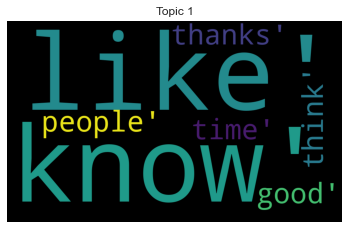

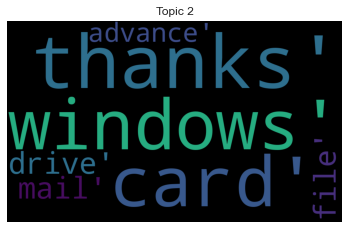

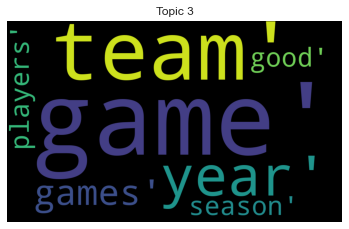

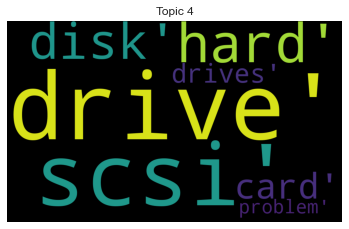

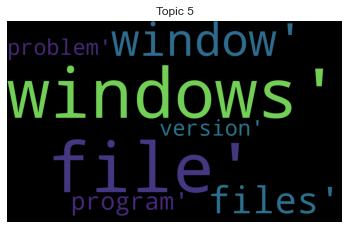

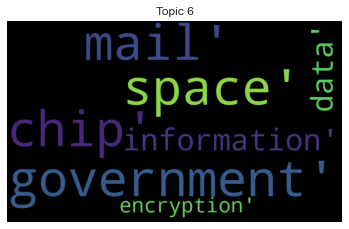

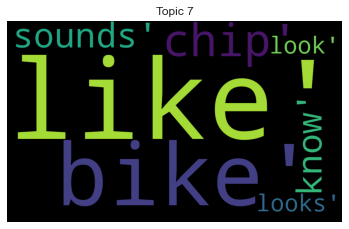

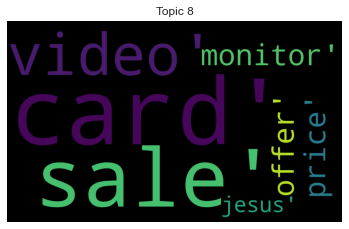

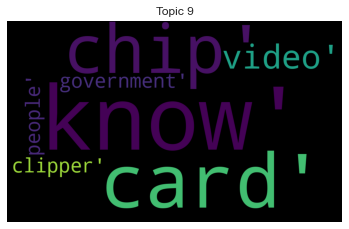

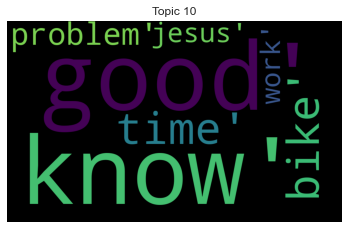

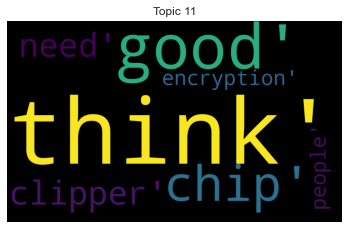

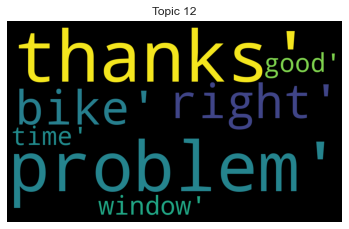

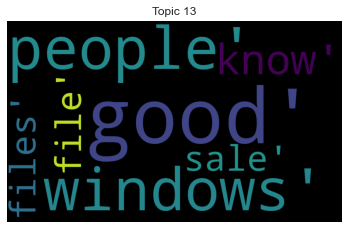

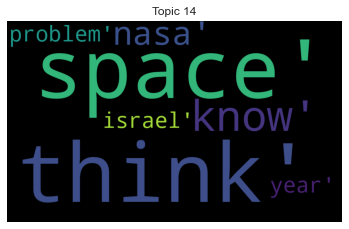

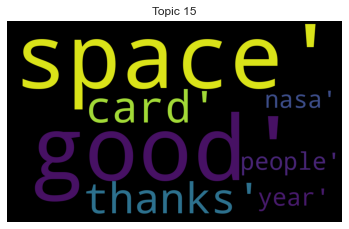

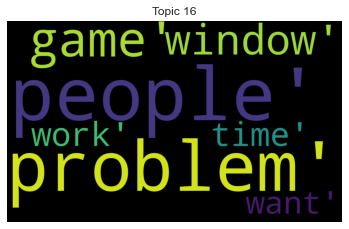

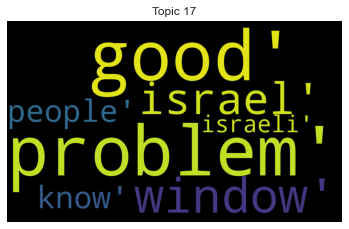

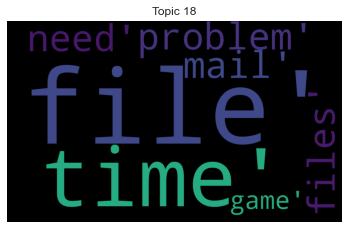

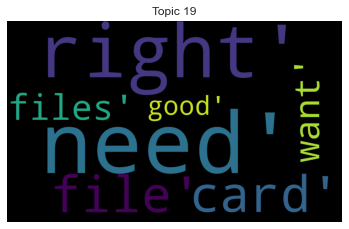

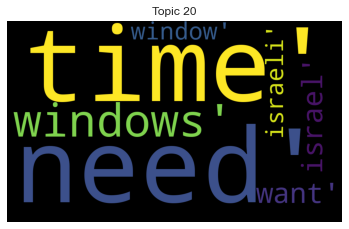

In [20]:
#visualisasi dengan wordcloud, kata dengan SVD terbesar (paling sering muncul) akan muncul dengan ukuran paling besar
for i in range(20):
  wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(str(topic_term_list[i]))
  plt.imshow(wc)
  plt.title(f"Topic {i+1}")
  plt.axis("off")
  plt.show()

In [21]:
X_topics=svd_model.fit_transform(X) 

In [22]:
from sklearn.manifold import TSNE #import modul TSNE utk transformasi data menjadi 2 dimensi
embedding = TSNE(n_components=2).fit_transform(X_topics)

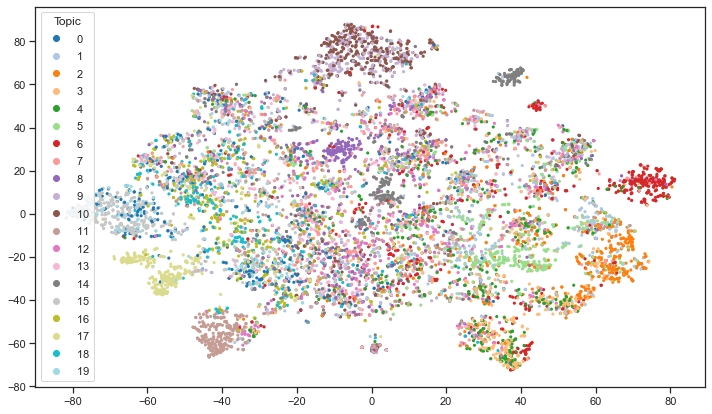

In [28]:
# Membuat plot sebaran topik
plt.figure(figsize=(12,7))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none',
cmap='tab20'
)
plt.legend(*scatter.legend_elements(num=20), title='Topic')
plt.show()

## Kesimpulan dari visualisasi: 
SVD dapat digunakan dalam penerapan topic modelling. Dengan menggunakan SVD, kita dapat mengubah kata kata menjadi vektor dan memberikan nilai pada kata kunci (kata yang sering muncul).
Plot di atas menunjukkan sebaran pesan dengan 20 warna berbeda yang merepresentasikan masing-masing topik.